In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
from sklearn import metrics
import json
from sklearn.cluster import KMeans

with open('../score_distributions/BAYC_totalScoreDistribution.json') as f:
    ds = json.load(f)

columns = ds['columns']
distributions = ds['distributions']
indexes = []

for distribution in distributions:
    indexes.append(distribution['tokenId'])

data = pd.DataFrame(columns=[*columns], index=indexes)

for index, token in enumerate(data.index):
    data.loc[token] = distributions[index]['totalScoreDistribution']

data.head()

,Hat,Mouth,Clothes,Eyes,Earring,Background,Fur,trait_count
8135,153.846154,357.142857,78.125,45.454545,12.150668,8.045052,8.136697,5.310674
2794,84.033613,384.615385,37.878788,92.592593,7.898894,3.937008,4.432624,1.42369
7678,7.745933,28.571429,129.87013,24.630542,35.211268,384.615385,1.878993,1.42369
8976,41.322314,25.188917,384.615385,12.150668,7.794232,70.921986,54.945055,5.310674
208,20.876827,26.525199,8.045052,384.615385,12.150668,19.569472,97.087379,5.310674


In [3]:
scaled_data = preprocessing.scale(data.T)
# scaled_data = preprocessing.StandardScaler().fit_transform(data.T)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

per_var


array([25.3, 15.4, 15.1, 14.8, 14.4, 12.2,  2.7,  0. ])

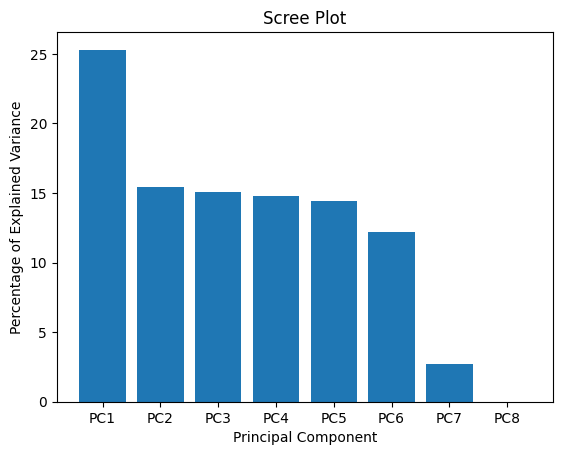

In [4]:
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

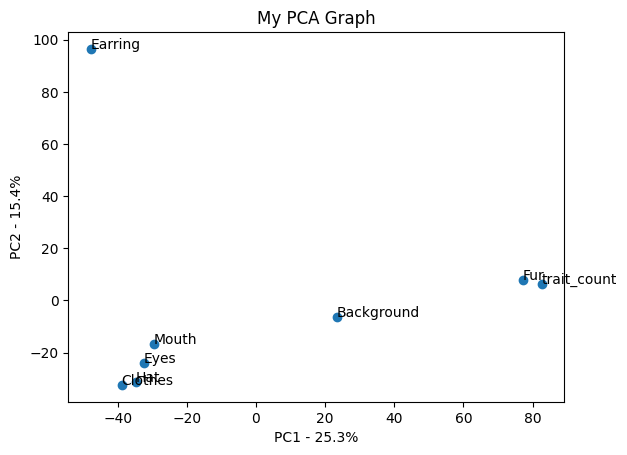

In [5]:
pca_df = pd.DataFrame(pca_data, index=[*columns], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for index in pca_df.index:
    plt.annotate(index, (pca_df.PC1.loc[index], pca_df.PC2.loc[index]))

plt.show()

K-Means clustering on High Dimensional Data

In [6]:
scaled_data_copy = data.copy()

scaled_data_copy[scaled_data_copy.columns] = preprocessing.StandardScaler().fit_transform(scaled_data_copy)
print(scaled_data_copy.describe())

                Hat         Mouth       Clothes          Eyes       Earring  \
count  9.999000e+03  9.999000e+03  9.999000e+03  9.999000e+03  9.999000e+03   
mean   9.095857e-17 -9.095857e-17 -7.958875e-17  1.023284e-16  1.136982e-17   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -7.921983e-01 -7.651194e-01 -7.896485e-01 -7.921836e-01 -8.231708e-01   
25%   -6.725536e-01 -6.464518e-01 -6.710041e-01 -6.707580e-01 -7.013161e-01   
50%   -2.864964e-01 -3.152350e-01 -2.881749e-01 -2.867030e-01 -2.888058e-01   
75%    3.611626e-01  3.251850e-01  3.566224e-01  3.330969e-01  3.494083e-01   
max    1.169272e+01  1.161784e+01  1.159088e+01  1.187857e+01  1.186978e+01   

         Background           Fur   trait_count  
count  9.999000e+03  9.999000e+03  9.999000e+03  
mean   1.136982e-17  4.547928e-17 -3.752041e-16  
std    1.000050e+00  1.000050e+00  1.000050e+00  
min   -6.402586e-01 -3.713879e-01 -6.464851e-01  
25%   -6.402586e-01 -3.713879e-01 -6.4

In [7]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(scaled_data_copy)
print('Explained variation per principle component: {}'.format(pca_2.explained_variance_ratio_))

Explained variation per principle component: [0.18934872 0.13336505]


In [8]:
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 32.27%


In [9]:
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=scaled_data_copy.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)



            Hat     Mouth   Clothes      Eyes   Earring  Background       Fur  \
PC_1  0.025676  0.025899  0.045658  0.043399  0.049954    0.183780  0.683421   
PC_2  0.749567  0.017450  0.542011  0.207405  0.106215    0.287137  0.082602   

      trait_count  
PC_1     0.700976  
PC_2     0.022361  


In [10]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 Fur            0.683421
trait_count    0.700976
Name: PC_1, dtype: float64


As per PC 2:
 Hat        0.749567
Clothes    0.542011
Name: PC_2, dtype: float64

******************************************************************


Parameter: {'n_clusters': 5} Score 0.231285479871916
Parameter: {'n_clusters': 6} Score 0.24071098169882096
Parameter: {'n_clusters': 7} Score 0.25522685771918274
Parameter: {'n_clusters': 8} Score 0.18590165414053106
Parameter: {'n_clusters': 9} Score 0.18275392968448273
Parameter: {'n_clusters': 10} Score 0.16950561747989804


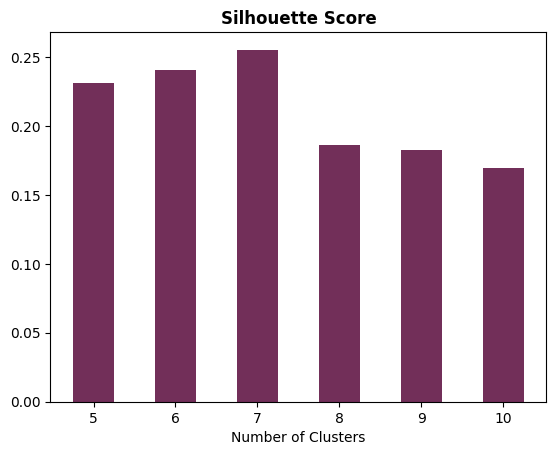

In [12]:
parameters = [5, 6,7,8,9,10]

parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()